# Explore ecotoxicological dataset

This notebook contains some preliminary analysis of the toxicity data set. For this, we need the following modules:

In [21]:
import numpy as np
import pandas as pd
import src.logbinning as bin
import matplotlib.pyplot as plt
from IPython.display import display

## Load data and check for missing values
Define relative paths and load the data:

In [5]:
DATA_PREPROC_PATH = "data/processed/final_db_processed.csv"
final_db = pd.read_csv(DATA_PREPROC_PATH)
final_db.head()

,test_cas,species,conc1_type,exposure_type,obs_duration_mean,conc1_mean,atom_number,alone_atom_number,bonds_number,doubleBond,tripleBond,ring_number,Mol,MorganDensity,LogP,class,tax_order,family,genus
0,100-00-5,rerio,F,F,48.0,15.0,0.317908,2,0.488106,1,0,1.0,0.535725,1.300,2.2482,Actinopterygii,Cypriniformes,Cyprinidae,Danio
1,100-00-5,rerio,F,F,96.0,15.0,0.317908,2,0.488106,1,0,1.0,0.535725,1.300,2.2482,Actinopterygii,Cypriniformes,Cyprinidae,Danio
2,100-01-6,rerio,F,S,96.0,87.6,0.317908,2,0.488106,1,0,1.0,0.510371,1.300,1.1770,Actinopterygii,Cypriniformes,Cyprinidae,Danio
3,100-02-7,rerio,F,AQUA,48.0,26.5,0.317908,2,0.488106,1,0,1.0,0.511738,1.300,1.3004,Actinopterygii,Cypriniformes,Cyprinidae,Danio
4,100-44-7,rerio,F,S,96.0,4.0,0.217006,0,0.447258,0,0,1.0,0.493578,1.125,2.4254,Actinopterygii,Cypriniformes,Cyprinidae,Danio


Check if there are missing values:

In [10]:
final_db.apply(lambda x: np.sum(pd.isna(x)))

test_cas             0
species              0
conc1_type           0
exposure_type        0
obs_duration_mean    0
conc1_mean           0
atom_number          0
alone_atom_number    0
bonds_number         0
doubleBond           0
tripleBond           0
ring_number          0
Mol                  0
MorganDensity        0
LogP                 0
class                0
tax_order            0
family               0
genus                0
dtype: int64

## Distribution and binning of concentration data
The distribution of the log10 of the concentrations is visualized.

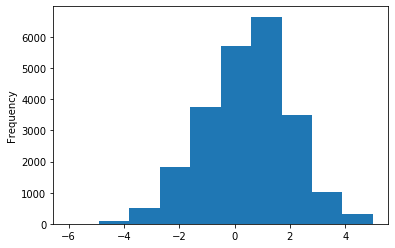

In [7]:
np.log10(final_db.loc[:,'conc1_mean']).plot.hist()

Bin the concentration data into 2 intervals (split at 1 mg/l) and into 5 intervals (split at 0.1, 1, 10, and 100 mg/l):

In [62]:
hist1, bin_edges = np.histogram(final_db.loc[:,'conc1_mean'], bins=np.array([-np.Inf,1,np.Inf]))
hist2, bin_edges = np.histogram(final_db.loc[:,'conc1_mean'], bins=np.array([-np.Inf,0.1,1,10,100,np.Inf]))
display(hist1)
display(hist2)

array([ 8424, 14908], dtype=int64)

array([4099, 4325, 5824, 5457, 3627], dtype=int64)

The number of samples in the intervals given the boundaries above is slightly skewed for the 2-interval binning but rather well balanced for the 5-interval binning.

## Order features based on wheter they relate to the chemical, the animal, or the experiment
The following code classifies the features of the preprocessed data according to this criterion:

In [68]:
feat_chem = ['test_cas', 'atom_number', 'alone_atom_number', 'bonds_number', 'doubleBond', 'tripleBond', 'ring_number', 'Mol',
             'MorganDensity', 'LogP']
feat_animal = ['species','class','tax_order','family','genus']
feat_experim = ['conc1_type','exposure_type', 'obs_duration_mean', 'conc1_mean']

In the preprocessing, duplicate experiments were removed and substituted by a single data point, which has the median concentration of the repeated experiments. It would in principle be preferable to keep the repetitions, since they provide valuable information about the uncertainty of the experiments.